## Project (E) 448
## Test
### Daniël S. van der Westhuizen
### 17158680

In [23]:
#imports
import numpy as np
import pylab as pl
from numpy.linalg import inv
from functions import *
import time

In [24]:
T = 100 # number of training points

train_x = np.random.rand(2,T)*2 - 1
train_x = train_x.transpose()
train_y = np.random.rand(T)
for a in range(0,T):
    x_loc = train_x[a,0]
    y_loc = train_x[a,1]
    r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
    r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
    r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
    train_y[a] = r1 + r2 + r3

resolution_width = 20

test_x = np.zeros((resolution_width**2,2))
row_count = 0
column_count = 0
for a in range(0,resolution_width):
    for b in range(0,resolution_width):
        x_loc = -1 + (b*(2/resolution_width))
        y_loc = -1 + (a*(2/resolution_width))
        test_x[a+resolution_width*b,0] = x_loc
        test_x[a+resolution_width*b,1] = y_loc
        
test_y = np.zeros((resolution_width,resolution_width))
for a in range(0,resolution_width):
    for b in range(0,resolution_width):
        x_loc = -1 + (b*(2/resolution_width))
        y_loc = -1 + (a*(2/resolution_width))
        r1 = np.exp( -( (( np.sqrt((x_loc+0.6)**2 + (y_loc+0.4)**2) ))**2) / (2*(0.3**2)) )
        r2 = np.exp( -( (( np.sqrt((x_loc)**2 + (y_loc)**2) ))**2) / (2*(0.2**2)) )
        r3 = np.exp( -( (( np.sqrt((x_loc-0.3)**2 + (y_loc-0.6)**2) ))**2) / (2*(0.2**2)) )
        test_y[a][b] = r1 + r2 + r3
test_y = test_y.transpose()
test_y = test_y.ravel()

alpha = 0.001
beta = 5
s = 0.2
M = 9


In [19]:
error_array = np.zeros(7)
test_pred_error_vari_array = np.zeros(7)
calc_time_array = np.zeros(7)
for a in range(3,10):
    q,w,e,r,t = lin_reg_pred_distrib(train_x,train_y,test_x,test_y,a,alpha,beta,s)
    error_array[a-3] = e
    test_pred_error_vari_array[a-3] = r
    calc_time_array[a-3] = t

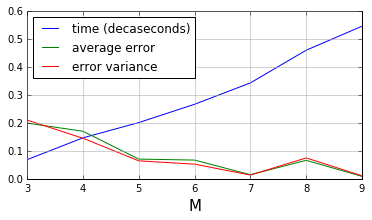

In [22]:
%matplotlib inline
pl.figure(figsize=(6,3))
plot_x = np.linspace(0,6,7) + 3
pl.plot(plot_x,calc_time_array/10,label='time (decaseconds)')
pl.plot(plot_x,error_array,label='average error')
pl.plot(plot_x,test_pred_error_vari_array,label='error variance')
pl.legend(loc='upper left')
pl.xlabel('M', fontsize=15)
pl.grid(b=True, which='both', color='0.65',linestyle='-')

In [ ]:
q,w,e,r,t = lin_reg_pred_distrib(train_x,train_y,test_x,test_y,M,alpha,beta,s)
pred_means = q
pred_means_avg = w
test_pred_avg_error = e
test_pred_error_vari = r
calc_time = t
#print(pred_means)
#print(pred_means_avg)
#print(test_pred_avg_error)
#print(calc_time)

In [ ]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(resolution_width,resolution_width), extent=[-1,1,1,-1],vmin=0,vmax=1.1)
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(test_y.reshape(resolution_width,resolution_width), extent=[-1,1,1,-1],vmin=0,vmax=1.1)
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.tight_layout()

In [ ]:
np.average(test_y)

In [ ]:
np.shape(train_x)

In [25]:
calc_time_array = np.zeros(5)
test_pred_error_vari_array = np.zeros(5)
error_array = np.zeros(5)

for a in range (0,5):
    
    theta0 = 1
    theta1 = 5
    theta2 = 1
    theta3 = 1
    beta = 4
    N=10*a

    q,w,e,r,t = Gauss_proc_kern_reg(train_x,train_y,test_x,test_y,N,beta,theta0,theta1,theta2,theta3)
    pred_means = q
    pred_means_avg = w
    test_pred_avg_error = e
    test_pred_error_vari = r
    calc_time = t
    #print(pred_means)
    #print(pred_means_avg)
    #print(test_pred_avg_error)
    #print(calc_time)
    
    
    error_array[a] = e
    test_pred_error_vari_array[a] = r
    calc_time_array[a] = t

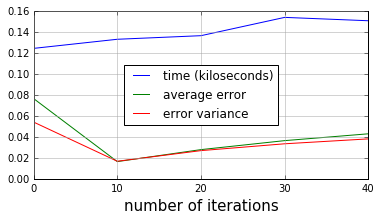

In [28]:
%matplotlib inline
pl.figure(figsize=(6,3))
plot_x = np.linspace(0,4,5)*10
pl.plot(plot_x,calc_time_array/1000,label='time (kiloseconds)')
pl.plot(plot_x,error_array,label='average error')
pl.plot(plot_x,test_pred_error_vari_array,label='error variance')
pl.legend(loc='center')
pl.xlabel('number of iterations', fontsize=15)
pl.locator_params(axis = 'x', nbins = 4)
pl.grid(b=True, which='both', color='0.65',linestyle='-')

In [ ]:
%matplotlib inline
pl.figure(figsize=(6,3))
pl.subplot(1, 2, 1)
pl.imshow(pred_means.reshape(resolution_width,resolution_width), extent=[-1,1,1,-1],vmin=0,vmax=1.1)
pl.gca().invert_yaxis()
pl.title("prediction", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.subplot(1, 2, 2)
pl.imshow(test_y.reshape(resolution_width,resolution_width), extent=[-1,1,1,-1],vmin=0,vmax=1.1)
pl.gca().invert_yaxis()
pl.title("original", fontsize=15)
pl.ylabel(r'$x_2$', fontsize=15)
pl.xlabel(r'$x_1$', fontsize=15)

pl.tight_layout()